In [ ]:


import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

# New Section

# New Section

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

resnet_weights_path = '/content/drive/MyDrive/Models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(my_new_model)
tfmodel = converter.convert()
open("Resnet50trained.tflite","wb").write(tfmodel)

In [ ]:
my_new_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=SGD(lr=1e-5,momentum=0.9),metrics=['acc'])

#es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

mc = ModelCheckpoint("Resnet50_best_model_1.h5", monitor="val_acc", mode="max", save_best_only=True)

resnet_history = my_new_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150, callbacks=[mc])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
56/56 [==============================] - 321s 5s/step - loss: 1.1451 - acc: 0.4209 - val_loss: 1.1250 - val_acc: 0.4141
Epoch 2/150
56/56 [==============================] - 32s 569ms/step - loss: 1.0085 - acc: 0.4936 - val_loss: 2.0024 - val_acc: 0.4229
Epoch 3/150
56/56 [==============================] - 31s 551ms/step - loss: 0.9117 - acc: 0.5774 - val_loss: 3.3042 - val_acc: 0.4229
Epoch 4/150
56/56 [==============================] - 31s 548ms/step - loss: 0.8430 - acc: 0.6316 - val_loss: 4.2488 - val_acc: 0.4229
Epoch 5/150
56/56 [==============================] - 32s 561ms/step - loss: 0.7853 - acc: 0.6696 - val_loss: 4.1249 - val_acc: 0.4207
Epoch 6/150
56/56 [==============================] - 32s 565ms/step - loss: 0.7289 - acc: 0.7177 - val_loss: 3.3260 - val_acc: 0.4207
Epoch 7/150
56/56 [==============================] - 31s 557ms/step - loss: 0.6768 - acc: 0.7457 - val_loss: 2.2921 - val_acc: 0.4207
Epoch 8/150
56/56 [==============================] - 33s 586ms/s

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = my_new_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[146   2   1]
 [  1 111   1]
 [  5   1 186]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.96      0.98      0.97       149
             Healthy       0.97      0.98      0.98       113
        Rust disease       0.99      0.97      0.98       192

            accuracy                           0.98       454
           macro avg       0.97      0.98      0.98       454
        weighted avg       0.98      0.98      0.98       454



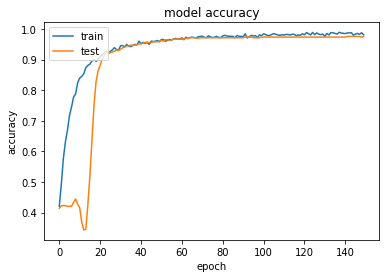

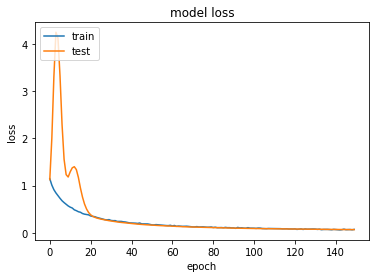

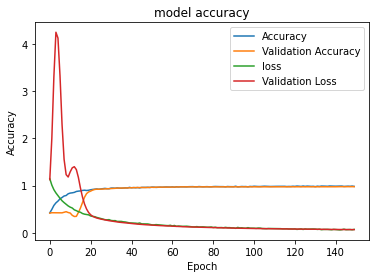

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
my_new_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=SGD(lr=1e-5,momentum=0.9),metrics=['acc'])

resnet_history = my_new_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

In [ ]:
my_new_model.save('/content/drive/MyDrive/Trained Models/Resnet50trained.h5')

In [ ]:
my_new_model.save('/content/drive/MyDrive/Trained Models/Resnet50trained.hdf5')

In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(my_new_model)
tfmodel = converter.convert()
open("Resnet50trained.tflite","wb").write(tfmodel)

In [ ]:
valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Valid",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")

from tensorflow import keras
#model = keras.models.load_model('/content/drive/MyDrive/Trained Models/Resnet50trained.h5')

Found 30 images belonging to 3 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = my_new_model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(valid_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[5 3 2]
 [4 3 3]
 [2 4 4]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.45      0.50      0.48        10
             Healthy       0.30      0.30      0.30        10
        Rust disease       0.44      0.40      0.42        10

            accuracy                           0.40        30
           macro avg       0.40      0.40      0.40        30
        weighted avg       0.40      0.40      0.40        30

